In [1]:
import os, urllib
from PIL import Image
from io import BytesIO
import numpy as np
from skimage.io import imshow
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.rcParams['figure.max_open_warning'] = False
import pandas as pd
import IPython
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
import DeepLabModel
import seaborn as sb
import pandas as pd
from ipywidgets import FloatSlider, interact, fixed, HBox, VBox, Label, Button, Output, IntProgress, FloatProgress, fixed, IntSlider

from DCSegUtils import *

In [2]:
agreements = {method: np.load('results/agreements_{}.npy'.format(method)) for method in ['v', 'ei', 'ep']}
proposals = {method: np.load('results/proposals_{}.npy'.format(method)) for method in ['v', 'ei', 'ep']}

### Convergence WRT the Agreement

In [8]:
def build_dataframe_mae(agreements, proposals):
    mae_pd = pd.DataFrame(columns=['step', 'model', 'label', 'method', 'mae'])
    for method in agreements.keys():
        prop = proposals[method] # shape (steps, agents, h, w, labels)
        agr = np.tile(np.expand_dims(agreements[method], 1), [1, prop.shape[1], 1, 1, 1]) # from (steps, h, w, labels) to (steps, agents, h, w, labels)
        mae = np.mean(np.abs(agr - prop), axis=(2,3))
        mae_temp = numpy_to_pandas_series(mae, index_values=[list(range(mae.shape[0])), ['net_' + l for l in ALL_LABELS], CHANNEL_NAMES]).to_frame(name='mae').reset_index()
        mae_temp.columns = ['step', 'model', 'label', 'mae']
        mae_temp.insert(3, "method", method)
        mae_pd = mae_pd.append(mae_temp)
    return mae_pd
            

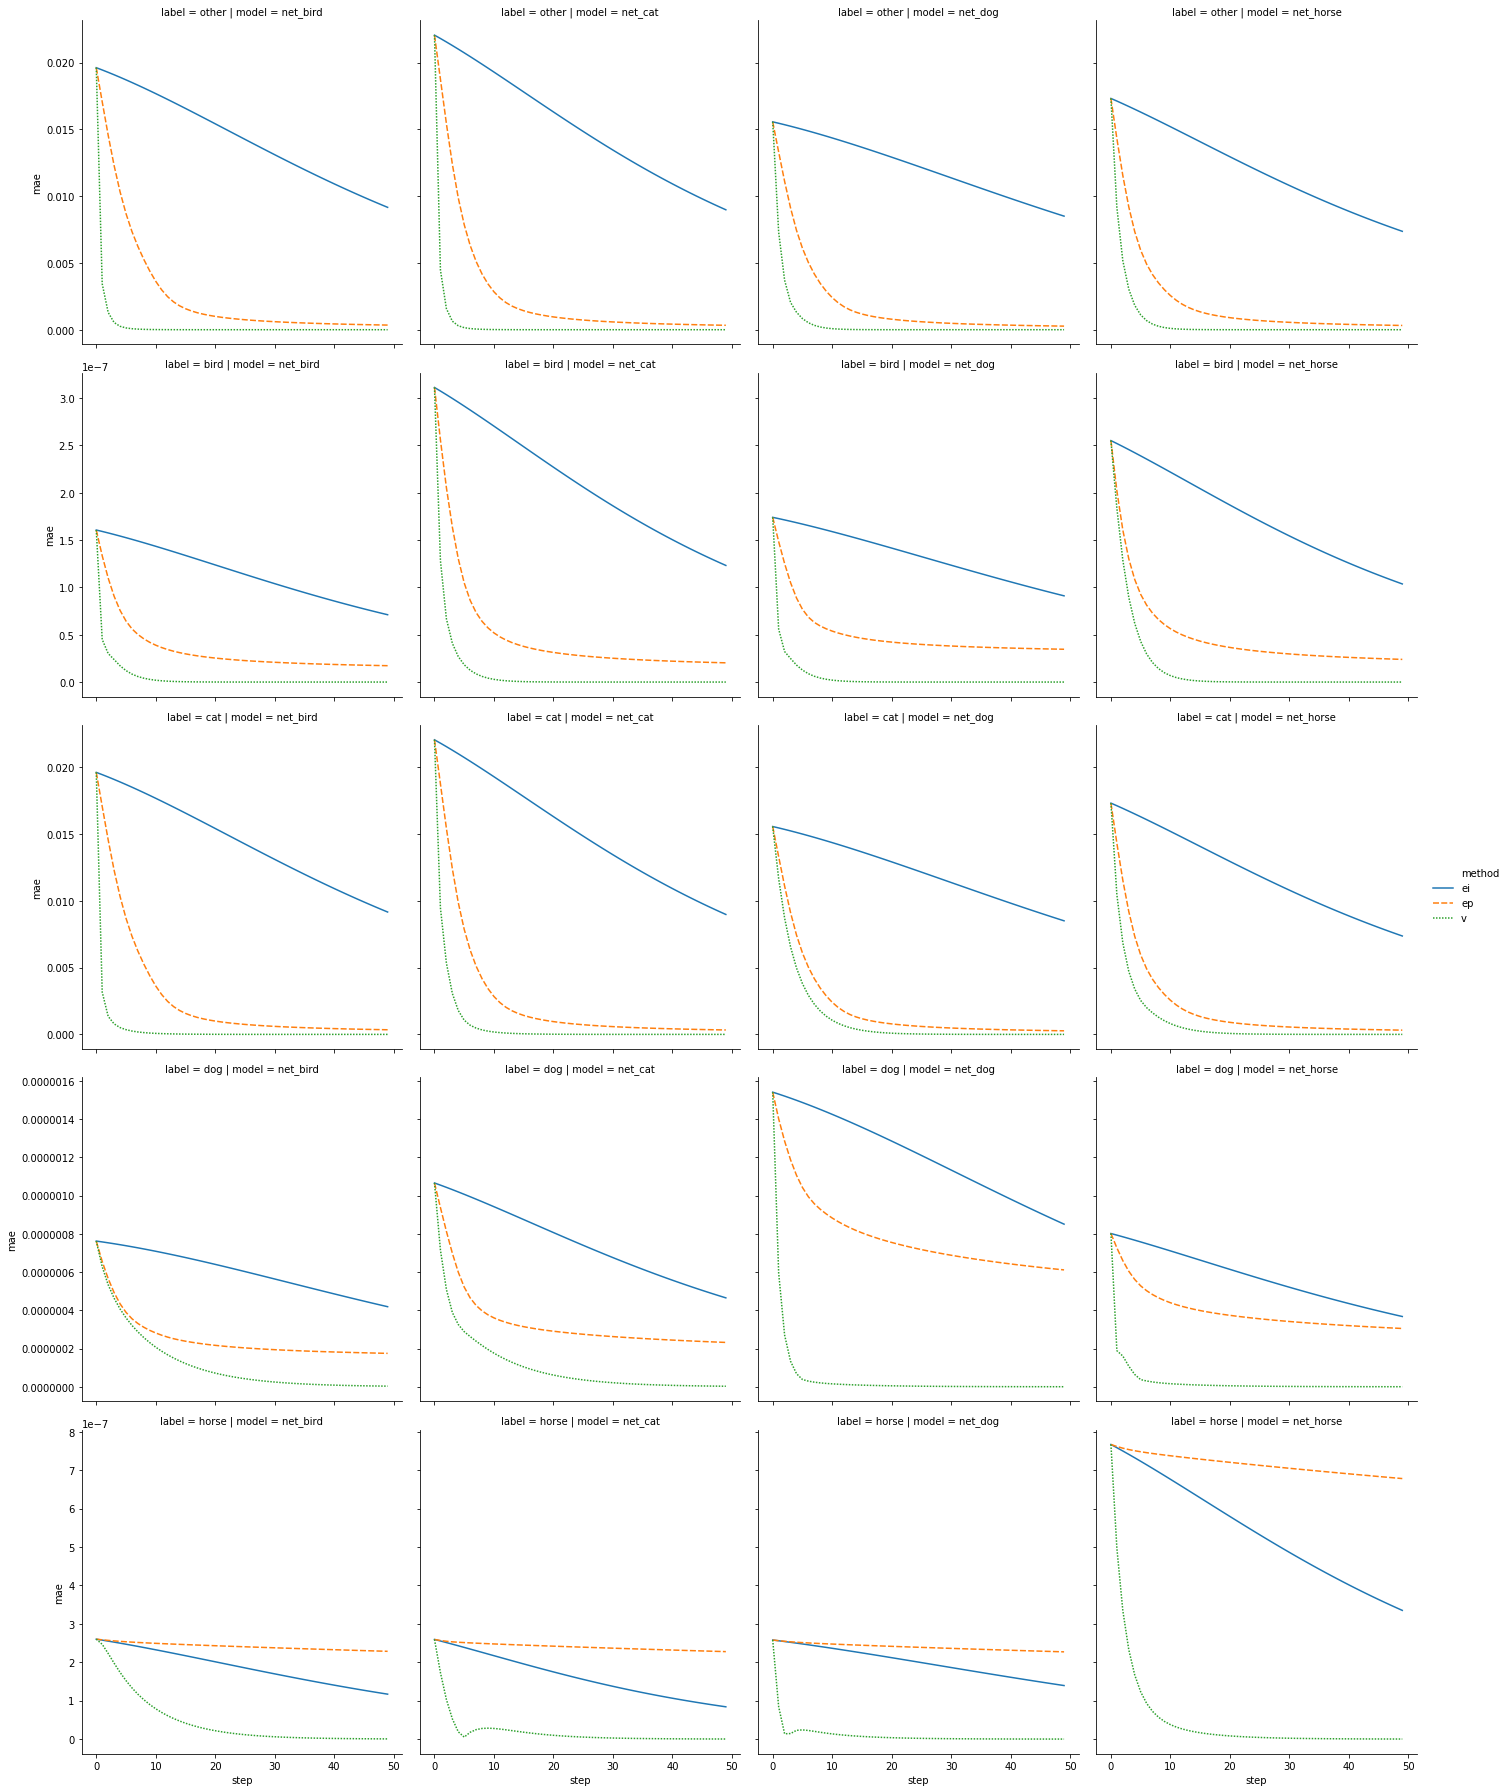

In [9]:
m = build_dataframe_mae(agreements, proposals)
plot = sb.relplot(data=m, x='step', y='mae', kind='line', hue='method', style='method', row='label', col='model', facet_kws={'sharey':'row'}, ci=None)

In [ ]:
mae_pd